# Step 1

### 1.1 K-mean AIDS Dataset

In [41]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

# Prepare datasets 
# Split dataset into a training set and test set
# Apply scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test

range(2, 11)
[0.30681863952871957, 0.31114891398199485, 0.27094283675508085, 0.2624880367405563, 0.25818315685962834, 0.23399041703590864, 0.2363111888735659, 0.24253652769704556, 0.22975430377266004]


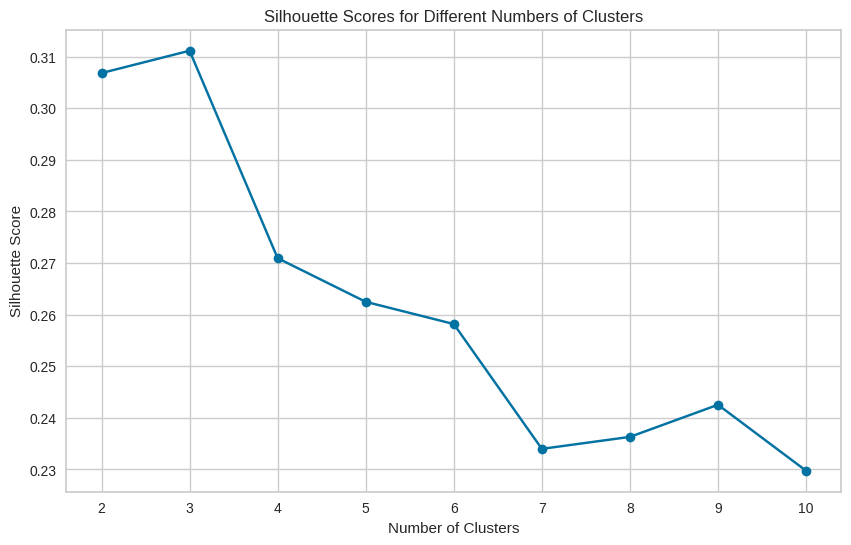

(3, 0.31114891398199485, 0.29814128259680595)

In [42]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

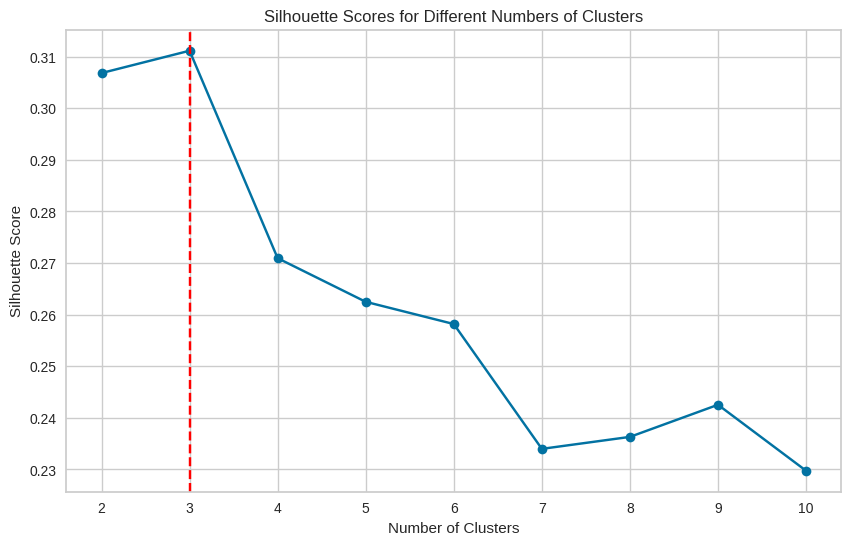

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

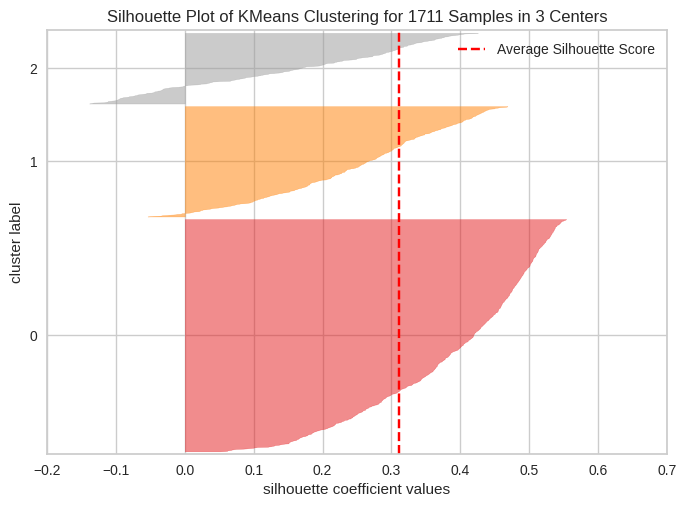

In [44]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

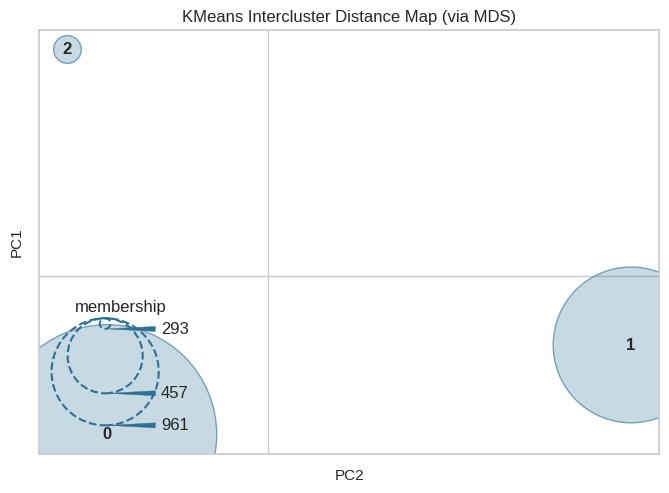

In [45]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 1.2 K-mean Wine Quality Dataset

In [46]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# Prepare datasets 
# Split dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test

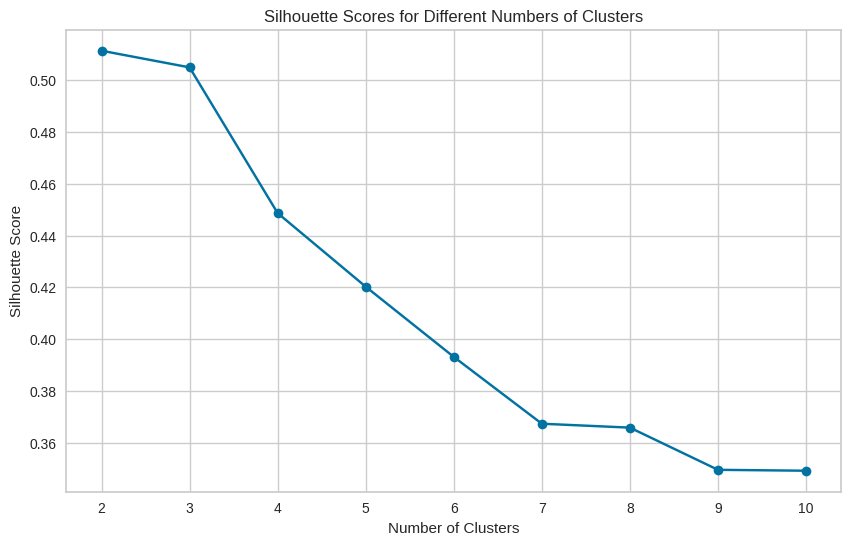

(2, 0.5113562667137755, 0.5068773961826333)

In [47]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

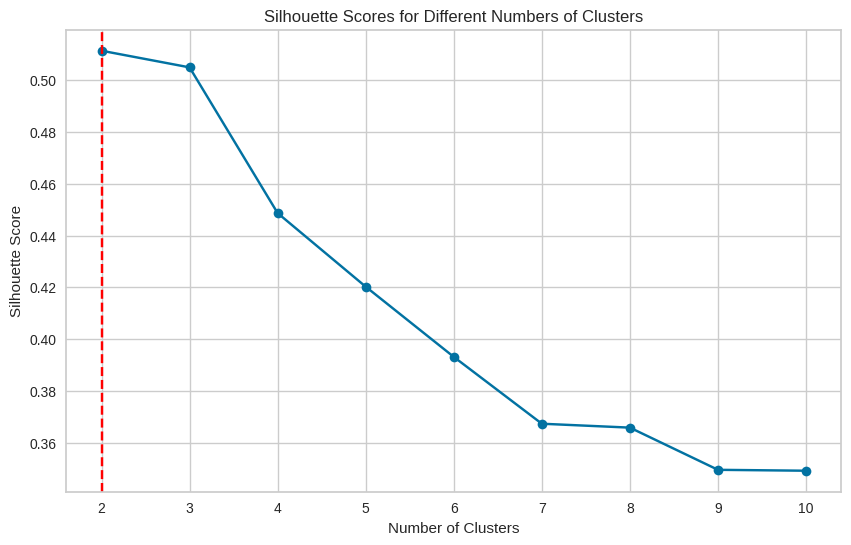

In [48]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red') 
plt.show()

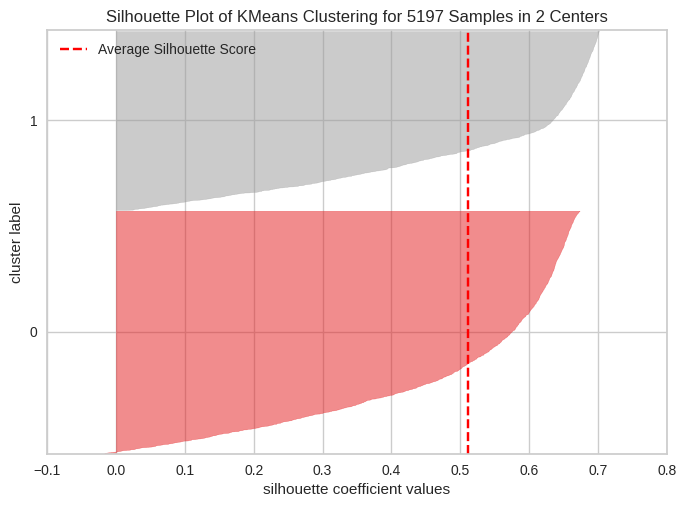

In [49]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

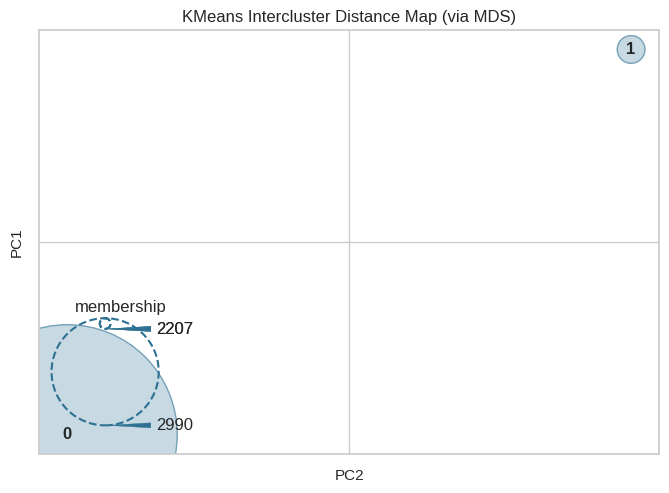

In [50]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 1.3 EM - AIDS Dataset

In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

# Prepare datasets 
# Split dataset into a training set and test set
# Apply scaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test

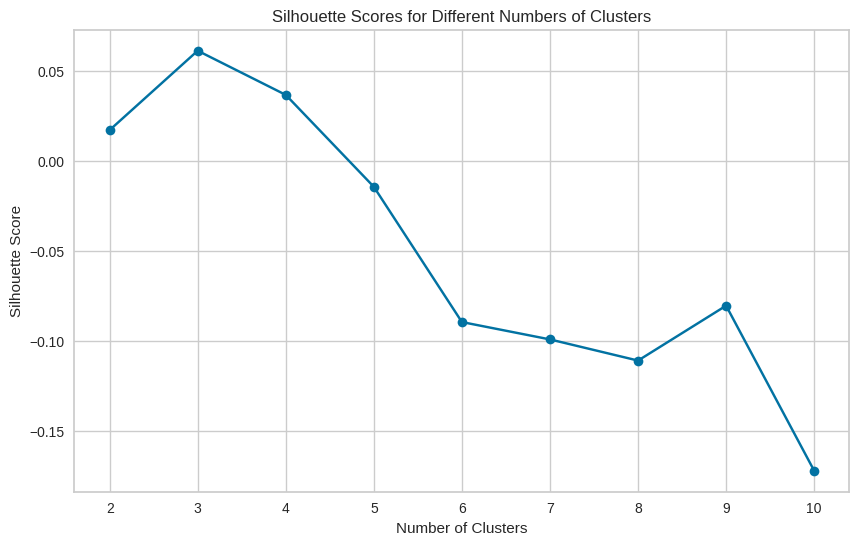

(3, 0.06126567430605626, 0.022771013678248932)

In [52]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

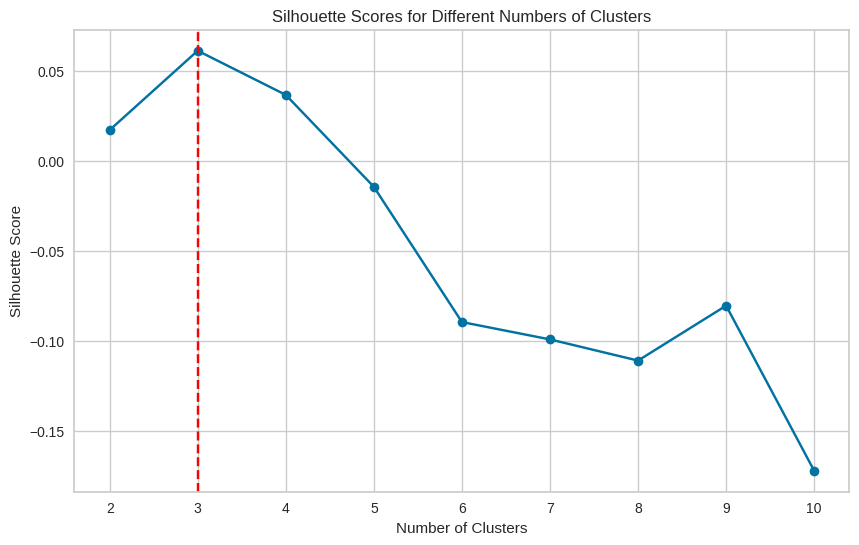

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

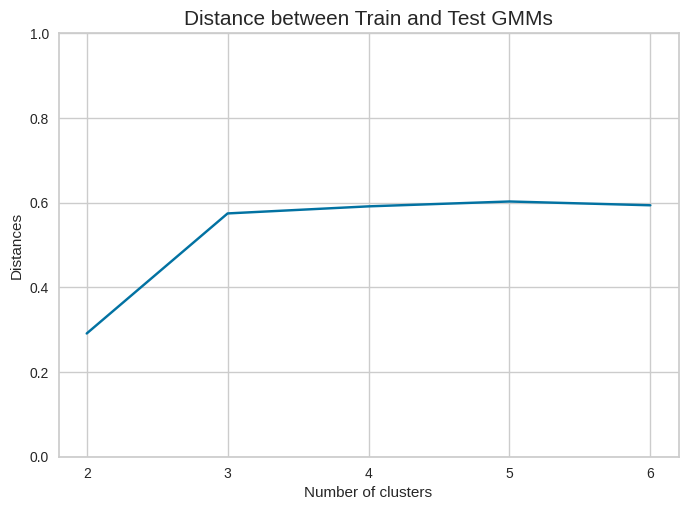

In [54]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 1.4 EM - Wine Quality Dataset

In [55]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

# Prepare datasets 
# Split dataset into a training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) # 80% training and 20% test

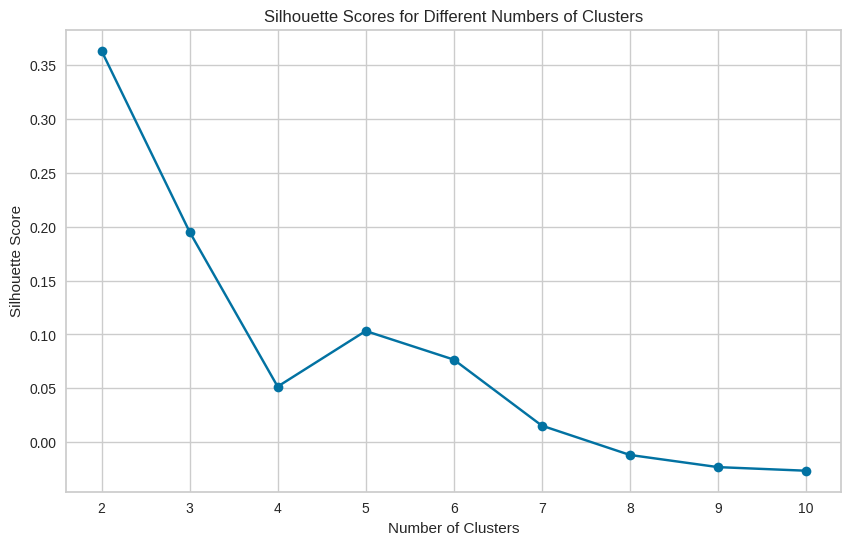

(2, 0.36352620283450443, 0.3444830844555124)

In [56]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

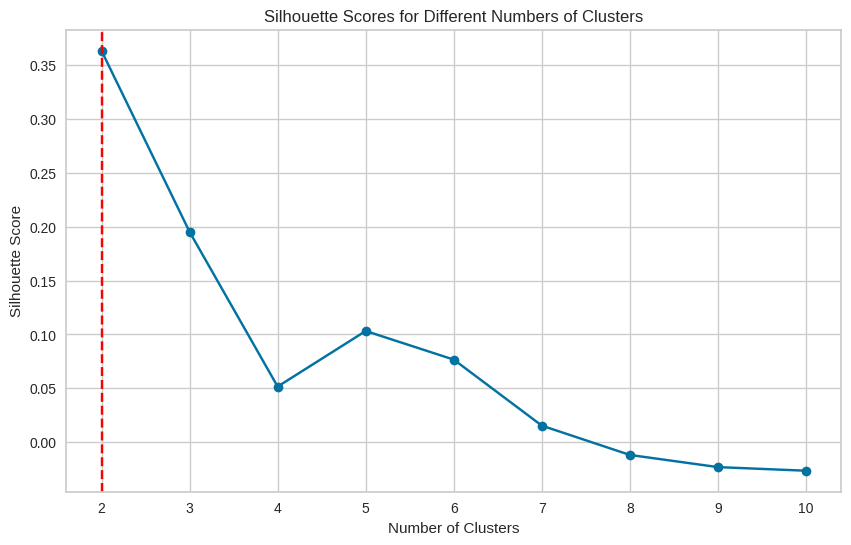

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

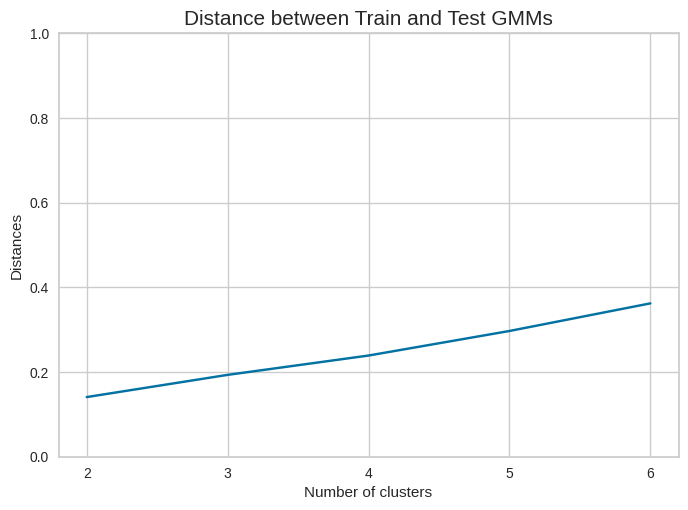

In [58]:
##
## Distance between GMMs (Gaussian Mixture)
## https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4    
##

# https://towardsdatascience.com/gaussian-mixture-model-clusterization-how-to-select-the-number-of-components-clusters-553bef45f6e4
def gmm_js(gmm_p, gmm_q, n_samples=10**5):

    # Courtesy of https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms. Here the difference is that we take the squared root, so it's a proper metric
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

num_clusters = 6  # the maximum number of clusters
model = KMeans    # clustering algorithm

list_clusters = list(range(2, num_clusters+1))
iterations=num_clusters+1
results=[]
results_signs=[]

for n in list_clusters:
    dists=[]

    for iteration in range(iterations):
        train, test=train_test_split(X, test_size=0.5)
        train_gmm=GaussianMixture(n, n_init=2).fit(train) 
        test_gmm=GaussianMixture(n, n_init=2).fit(test) 
        dists.append(gmm_js(train_gmm, test_gmm))
    temp = np.array(np.array(dists))
    sel = temp[np.argsort(temp)[:int(iterations/5)]]
    result = np.mean(sel)
    result_sign = np.std(sel)

    results.append(result)
    results_signs.append(result_sign)

plt.errorbar(list_clusters, results, yerr=results_signs)
plt.title("Distance between Train and Test GMMs", fontsize=15)
plt.xticks(list_clusters)
plt.xlabel("Number of clusters")
plt.ylabel("Distances")
plt.ylim(0, 1)
plt.show()

### 2.1. PCA - AIDS

In [59]:
pca = PCA(random_state=100).fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color="C1", label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - AIDS Dataset")
plt.legend(loc='best')
plt.show()

NameError: name 'PCA' is not defined

In [ ]:
start = time.time()
pca = PCA(n_components= 6, random_state=100).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
cv_score = cross_val_score(classifier, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.8106497948016417
Test Accuracy: 0.8317757009345794


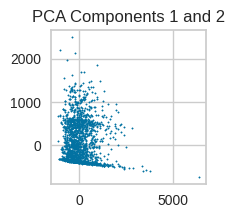

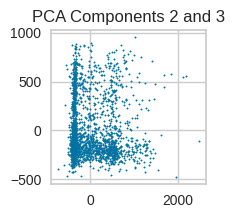

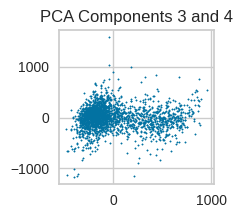

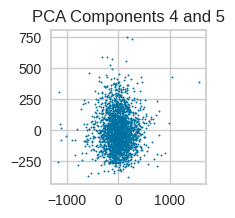

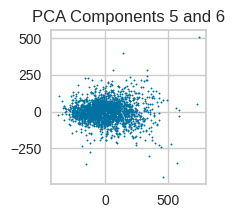

In [181]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('PCA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_pca[:,i], X_pca[:,i+1], s=1)

### 2.2 ICA - AIDS

In [184]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    ica = FastICA(n_components=i, max_iter=1000, tol=0.1, random_state=100).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    print("n_components: {} , Cross Validation Score: {}".format(i, cv_score))
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1, random_state=100).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n_components: 2 , Cross Validation Score: 0.6703967168262652
n_components: 3 , Cross Validation Score: 0.8187893296853627
n_components: 4 , Cross Validation Score: 0.8036798905608755
n_components: 5 , Cross Validation Score: 0.8130232558139536
n_components: 6 , Cross Validation Score: 0.8048016415868673
n_components: 7 , Cross Validation Score: 0.8012653898768811
n_components: 8 , Cross Validation Score: 0.8059302325581397
n_components: 9 , Cross Validation Score: 0.8065868673050616
n_components: 10 , Cross Validation Score: 0.8042202462380302
n_components: 11 , Cross Validation Score: 0.8281668946648427
n_components: 12 , Cross Validation Score: 0.8112175102599182
n_components: 13 , Cross Validation Score: 0.8322708618331054
n_components: 14 , Cross Validation Score: 0.8328454172366622
n_components: 15 , Cross Validation Score: 0.8434062927496582
n_components: 16 , Cross Validation Score: 0.8386935704514364
n_components: 17 , Cross Validation Score: 0.7972435020519837
n_components: 18

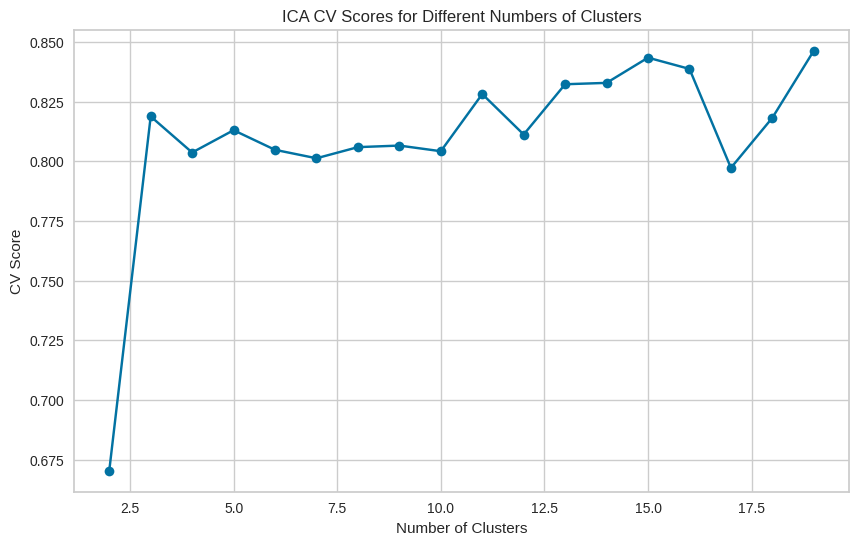

In [185]:
# Draw ICA Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("ICA CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

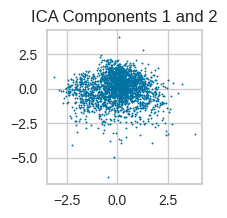

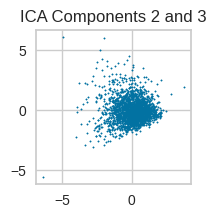

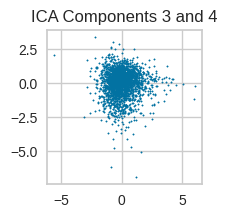

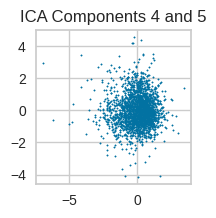

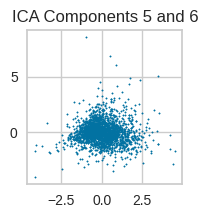

In [187]:
n = 6
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('ICA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_ica[:,i], X_ica[:,i+1], s=1)

### 2.3 Randomized Projections - AIDS

In [189]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=100).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=100).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 9
Test Accuracy: 0.6658878504672897


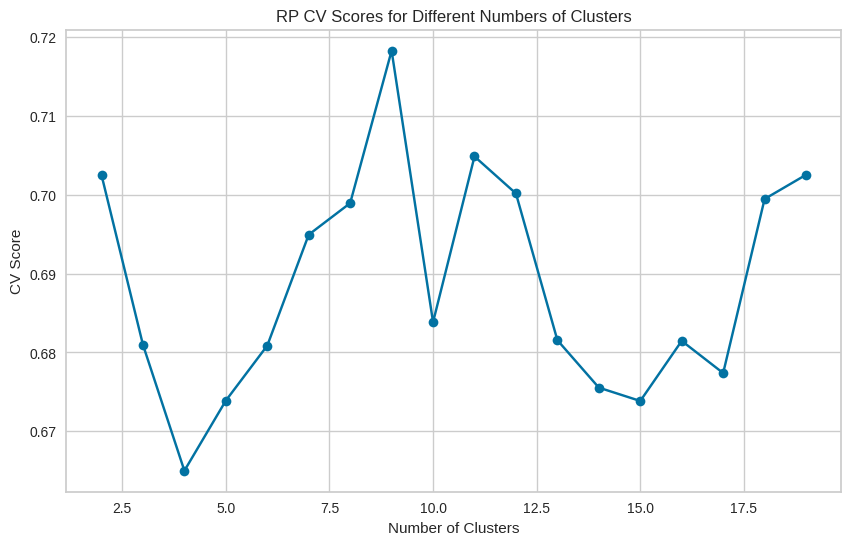

In [190]:
# Draw Randomized Projections Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("RP CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

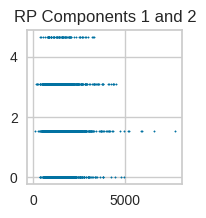

In [191]:
n = 2
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('RP Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_rp[:,i], X_rp[:,i+1], s=1)

### 2.4. SVD - AIDS

5

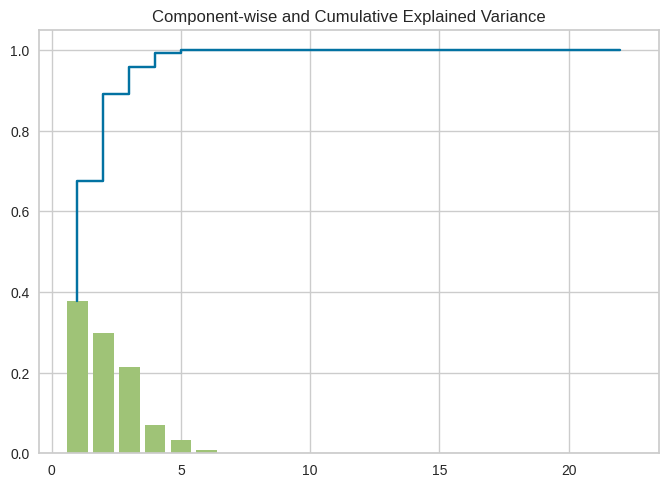

In [195]:
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, color="C1", label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), label='Cumulative explained variance')

plt.title("Component-wise and Cumulative Explained Variance")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

In [196]:
svd = TruncatedSVD(n_components=6).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Test Accuracy: 0.8060747663551402


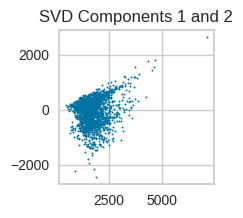

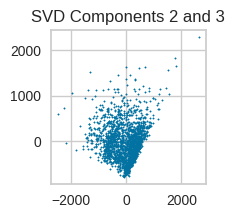

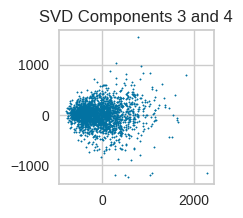

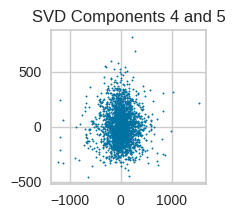

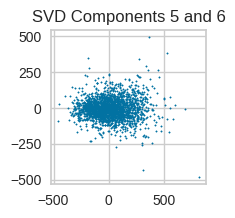

In [197]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('SVD Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_svd[:,i], X_svd[:,i+1], s=1)

In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
import matplotlib.pyplot as plt
import time
from sklearn import datasets
from sklearn.decomposition import PCA, FastICA
#from sklearn.random_projection import GaussianRandomProjection
from sklearn import random_projection
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
import numpy as np
from ucimlrepo import fetch_ucirepo 

# Load UCI Wine Quality - https://archive.ics.uci.edu/dataset/186/wine+quality

# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 

### 2.5 PCA - Wine Quality

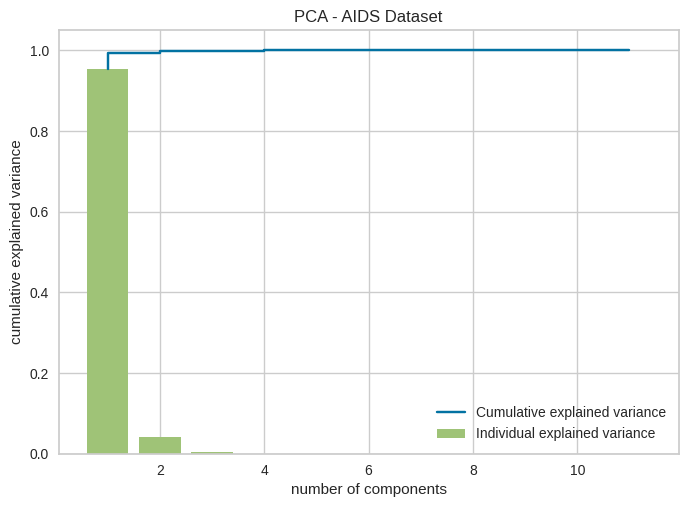

Time(s) 0.005305051803588867
original shape: (6497, 11)
transformed shape: (6497, 3)

Cross validation score: 0.45410528660528665
Test Accuracy: 0.4907692307692308


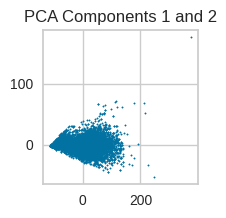

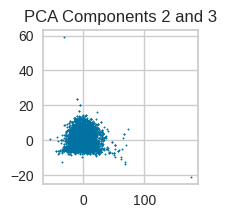

In [13]:
pca = PCA(random_state=100).fit(X)

# https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color="C1", label='Individual explained variance')
plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("PCA - AIDS Dataset")
plt.legend(loc='best')
plt.show()

start = time.time()
pca = PCA(n_components= 3, random_state=100).fit(X)
print("Time(s) " + str(time.time() - start))
print("original shape:", X.shape)
X_pca = pca.transform(X)
print("transformed shape:", X_pca.shape)
print()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
classifier = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 10)
cv_score = cross_val_score(classifier, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n = 3
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('PCA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_pca[:,i], X_pca[:,i+1], s=1)

### 2.6 ICA - Wine Quality

n_components: 2 , Cross Validation Score: 0.47547000297000286
n_components: 3 , Cross Validation Score: 0.4723819423819425
n_components: 4 , Cross Validation Score: 0.502989307989308
n_components: 5 , Cross Validation Score: 0.5343443718443719
n_components: 6 , Cross Validation Score: 0.5435736560736562
n_components: 7 , Cross Validation Score: 0.5447497772497772
n_components: 8 , Cross Validation Score: 0.5430071280071281
n_components: 9 , Cross Validation Score: 0.5578237303237302
n_components: 10 , Cross Validation Score: 0.5353036828036829
n_components: 11 , Cross Validation Score: 0.5585892485892485
n_components: 12 , Cross Validation Score: 0.5576113751113752
n_components: 13 , Cross Validation Score: 0.5547223047223048
n_components: 14 , Cross Validation Score: 0.5674569349569349
n_components: 15 , Cross Validation Score: 0.5460788535788536
n_components: 16 , Cross Validation Score: 0.5601403326403327
n_components: 17 , Cross Validation Score: 0.5576440451440453
n_components: 18

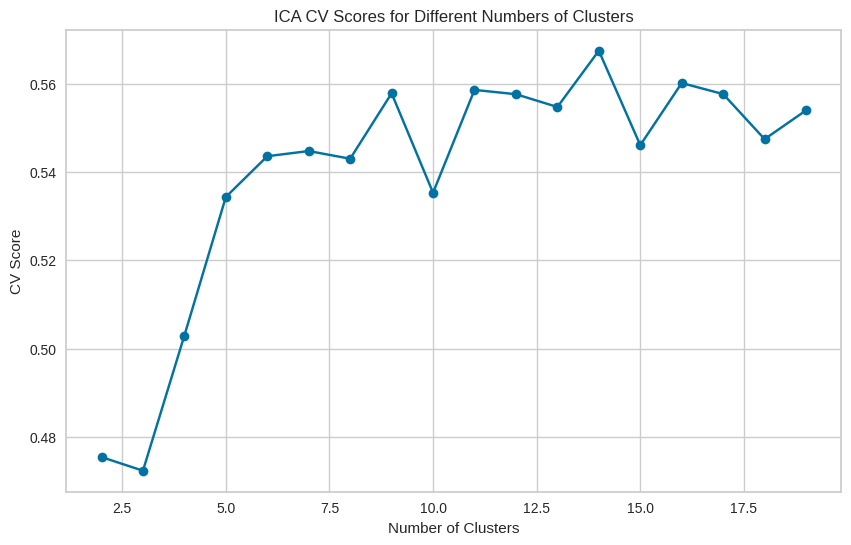

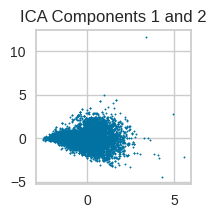

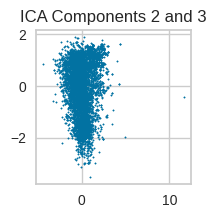

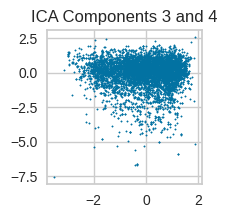

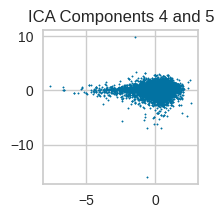

In [15]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    ica = FastICA(n_components=i, max_iter=1000, tol=0.1, random_state=100).fit(X)
    X_ica = ica.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    print("n_components: {} , Cross Validation Score: {}".format(i, cv_score))
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
print("Best n_components: " + str(best_n[0]))
ica = FastICA(n_components=int(best_n[0]), max_iter=10000, tol=0.1, random_state=100).fit(X)
X_ica = ica.fit_transform(X) 
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

# Draw ICA Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("ICA CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

n = 5
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('ICA Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_ica[:,i], X_ica[:,i+1], s=1)

### 2.7 Randomized Projections - Wine Quality

Best n_components: 12
Test Accuracy: 0.5476923076923077


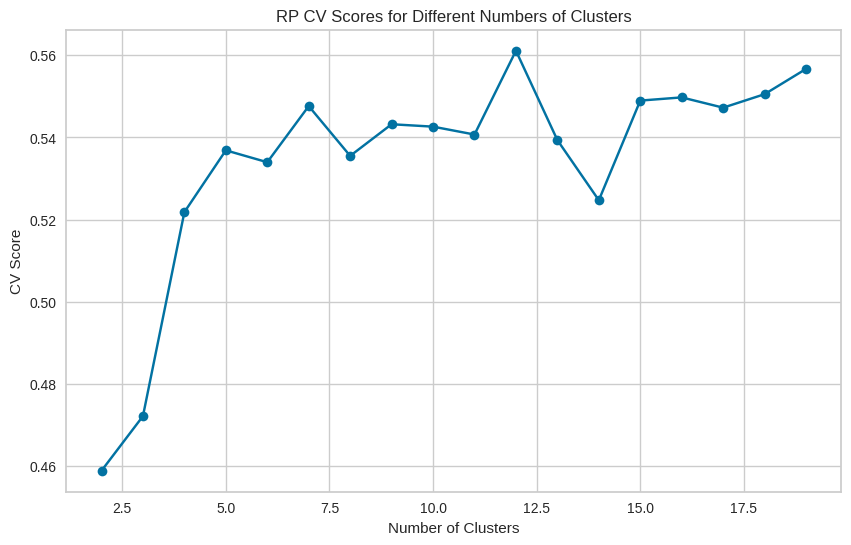

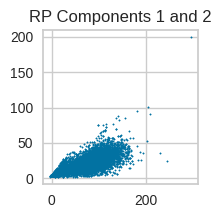

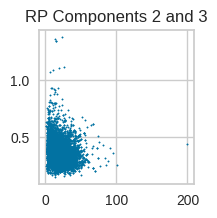

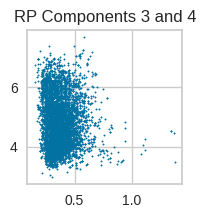

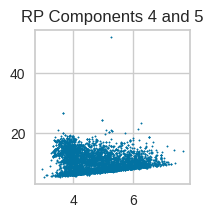

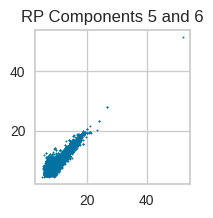

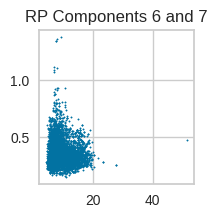

In [17]:
best_n = (0, 0)
scores = []
for i in range(2, 20):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=100).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    scores.append(cv_score)
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=100).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

# Draw Randomized Projections Score
plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title("RP CV Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("CV Score")
plt.show()

n = 7
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('RP Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_rp[:,i], X_rp[:,i+1], s=1)

### 2.8 SVD - Wine Quality

Test Accuracy: 0.5330769230769231


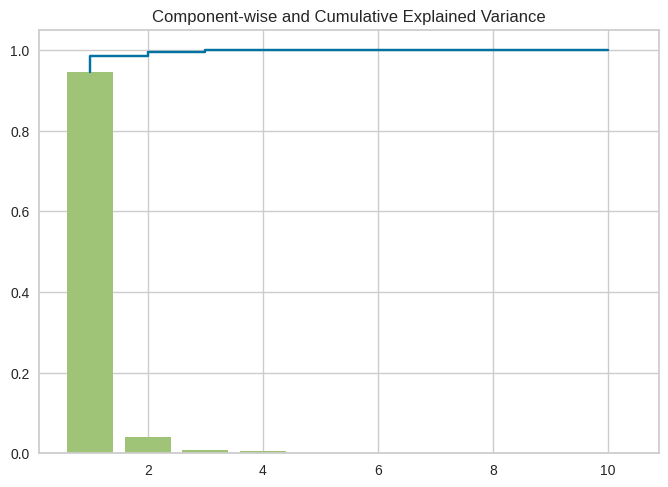

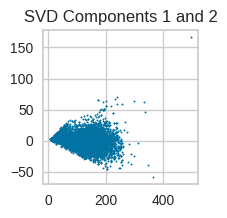

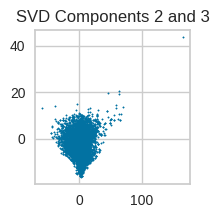

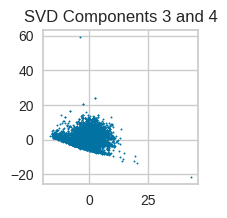

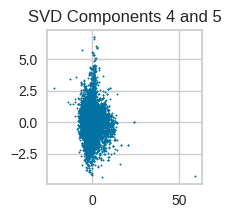

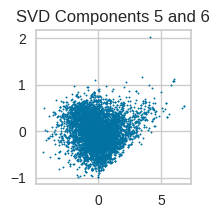

In [18]:
tsvd = TruncatedSVD(n_components=X.shape[1]-1)
X_tsvd = tsvd.fit(X)

tsvd_var_ratios = tsvd.explained_variance_ratio_
plt.bar(range(1, len(tsvd_var_ratios) + 1), tsvd_var_ratios, color="C1", label='Individual explained variance')
plt.step(range(1, len(tsvd_var_ratios) + 1), np.cumsum(tsvd_var_ratios), label='Cumulative explained variance')

plt.title("Component-wise and Cumulative Explained Variance")

# https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

select_n_components(tsvd_var_ratios, 0.99)

svd = TruncatedSVD(n_components=6).fit(X)
X_svd = svd.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

for i in range(0, n-1):
        plt.figure(figsize=(2,2))
        plt.title('SVD Components {} and {}'.format(i+1, i+2))
        plt.scatter(X_svd[:,i], X_svd[:,i+1], s=1)

### 3.1 K-mean AIDS, PCA

In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
from ucimlrepo import fetch_ucirepo 
from sklearn.mixture import GaussianMixture

# Load UCI AIDS crinical dataset - https://archive.ics.uci.edu/dataset/890/aids+clinical+trials+group+study+175

# fetch dataset 
aids_clinical_trials_group_study_175 = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids_clinical_trials_group_study_175.data.features 
y = aids_clinical_trials_group_study_175.data.targets 
y=y.cid

In [26]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3155228592949331, 0.31076467294950155, 0.2680669146506179, 0.25907584325261357, 0.25773515732969093, 0.23174500577108598, 0.23399588286708198, 0.2425900204690044, 0.23702449868788186]


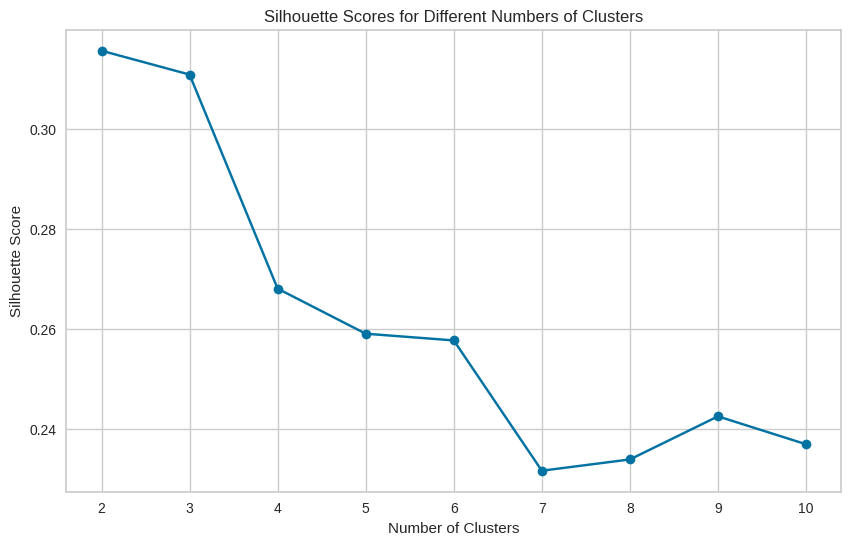

(2, 0.3165957948156324, 0.3131552621286129)

In [27]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

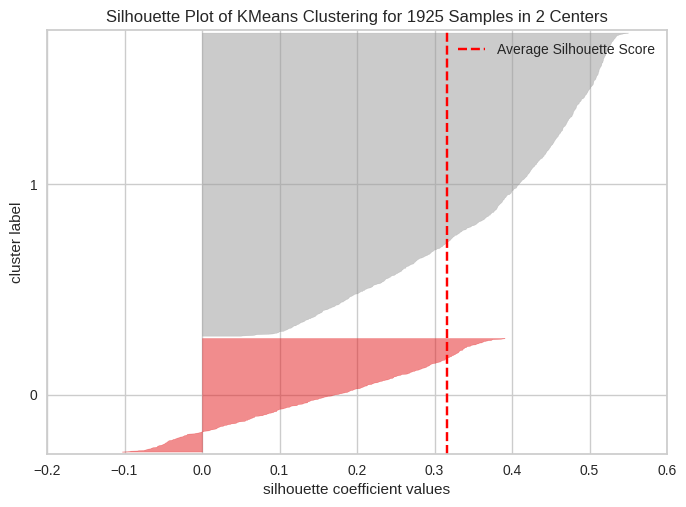

In [28]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

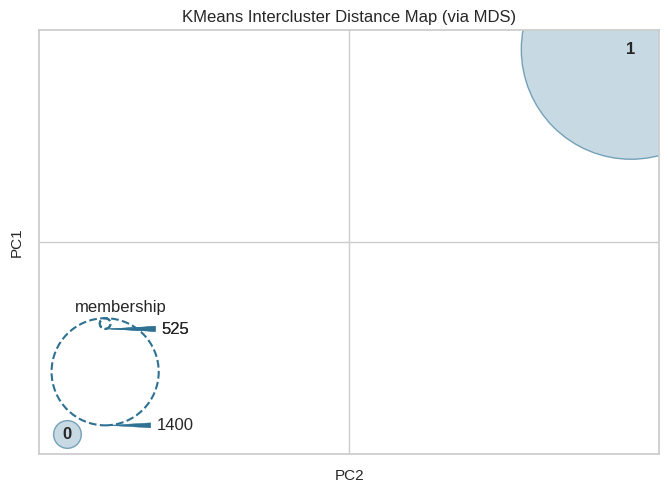

In [29]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.2 K-mean AIDS, ICA

In [34]:
n = 6
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.19904356627928427, 0.17887587388929702, 0.1801366614502657, 0.16628033039943835, 0.15811569991964958, 0.16168059472218188, 0.16416078332225206, 0.15522019192447623, 0.1419658880701868]


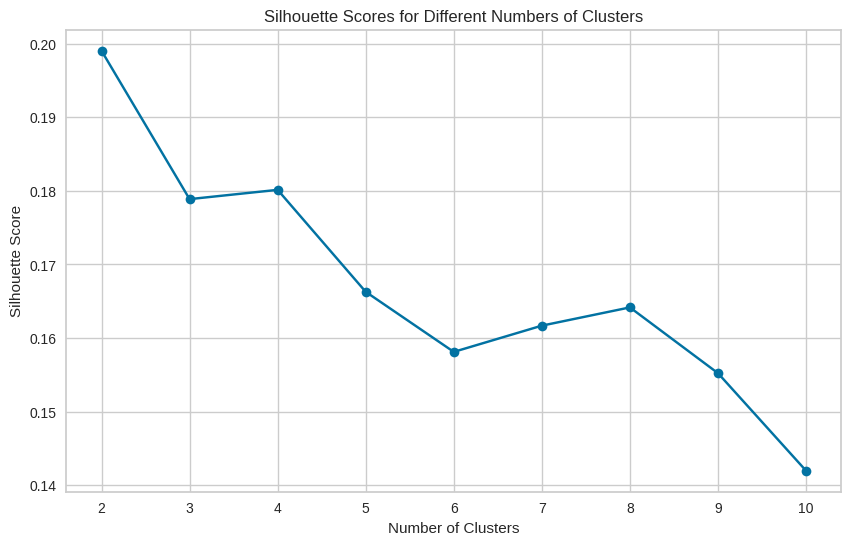

(2, 0.19904356627928427, 0.20838083247396796)

In [35]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

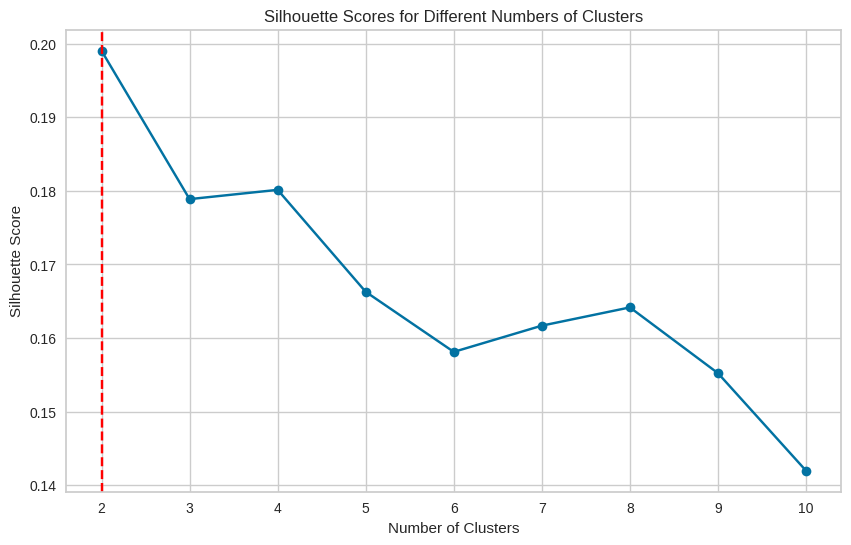

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

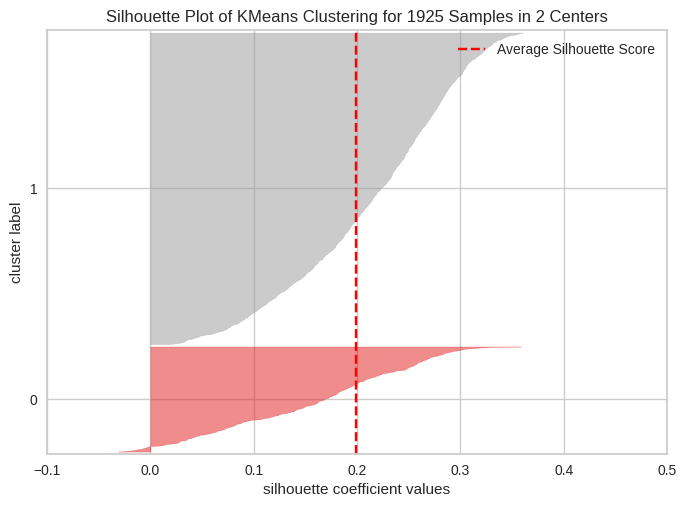

In [37]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

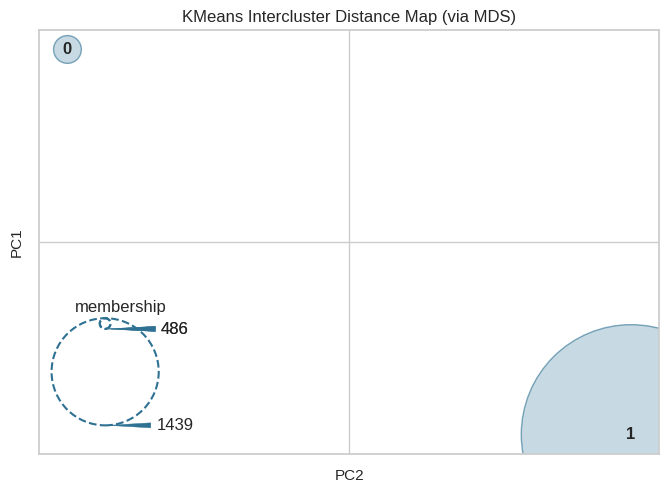

In [38]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.3 K-mean AIDS, RP

In [39]:
n = 2
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.609228736692447, 0.5654278434673419, 0.5500338399166611, 0.5295234713880148, 0.5306229607054594, 0.5241858033074595, 0.5230952659684591, 0.5277653717120294, 0.5319201274365709]


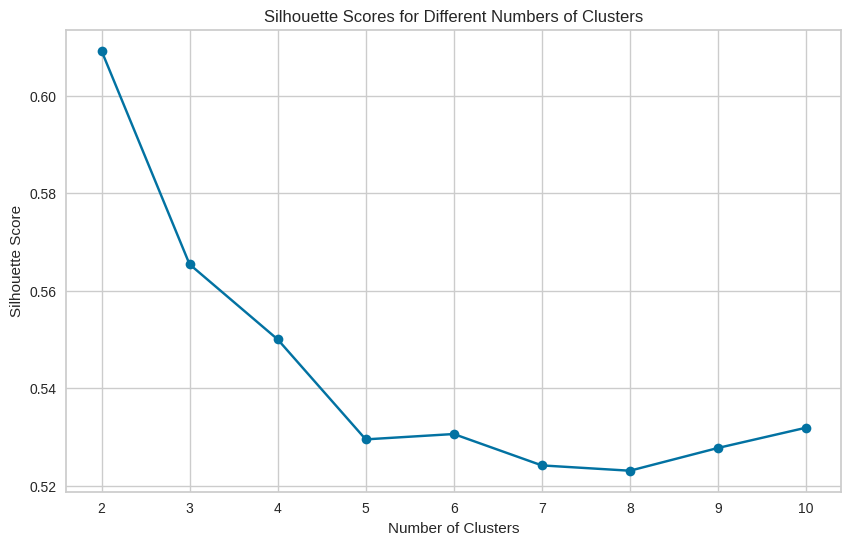

(2, 0.609228736692447, 0.5843056120134751)

In [40]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

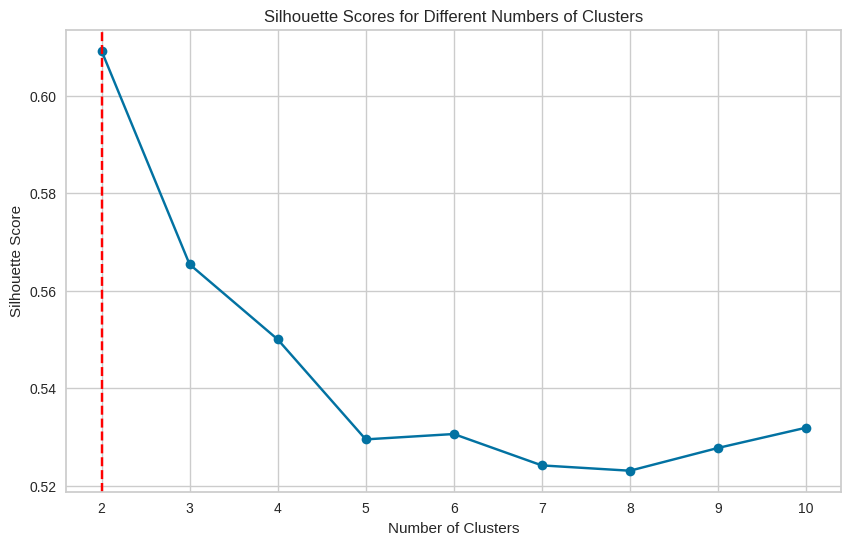

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

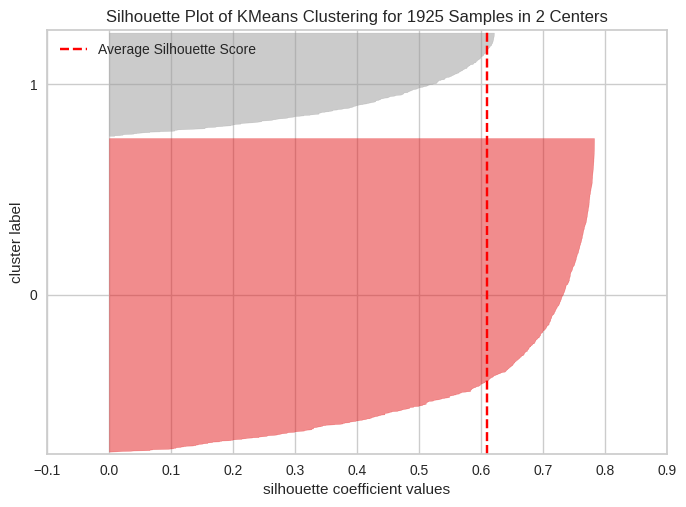

In [42]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

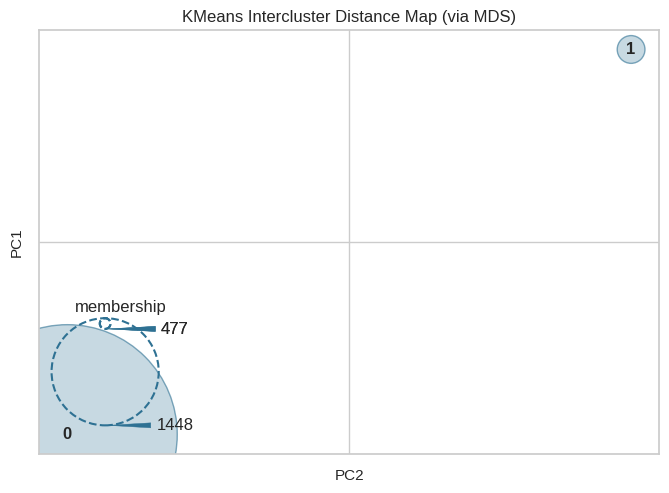

In [43]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.4 K-mean AIDS, SVD

In [49]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

range(2, 11)
[0.3156622633421653, 0.3110068989948957, 0.268265099605313, 0.25927622510208803, 0.2578261825183163, 0.2313378297619613, 0.23366532680515228, 0.2427148174822771, 0.23446394916582886]


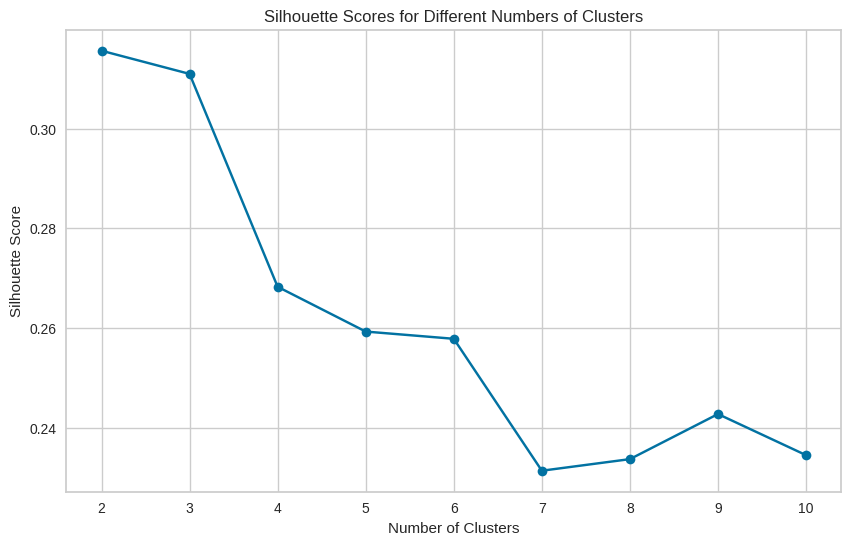

(2, 0.3167332903398681, 0.3133417752977396)

In [50]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=100)
    kmeans.fit(X_train)
    labels = kmeans.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

print(cluster_range)
print(silhouette_scores)
# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_train)
train_labels_optimal = kmeans_optimal.predict(X_train)
test_labels_optimal = kmeans_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

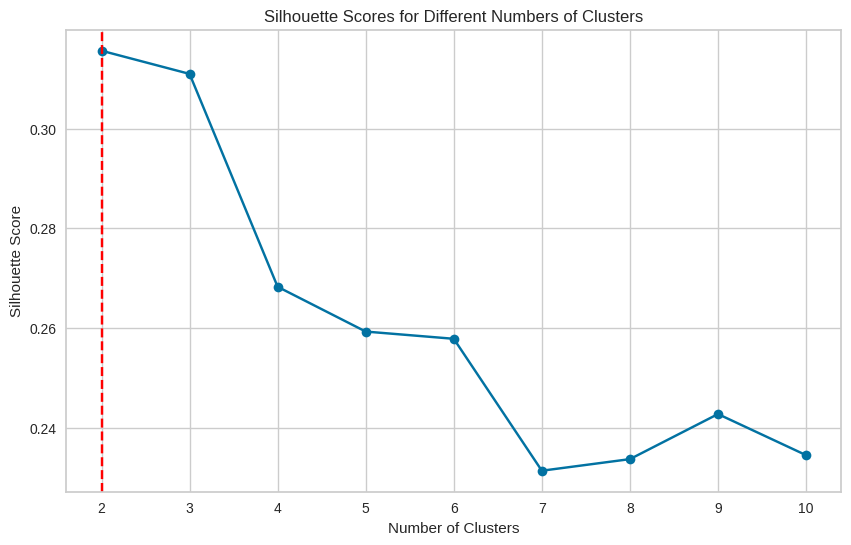

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

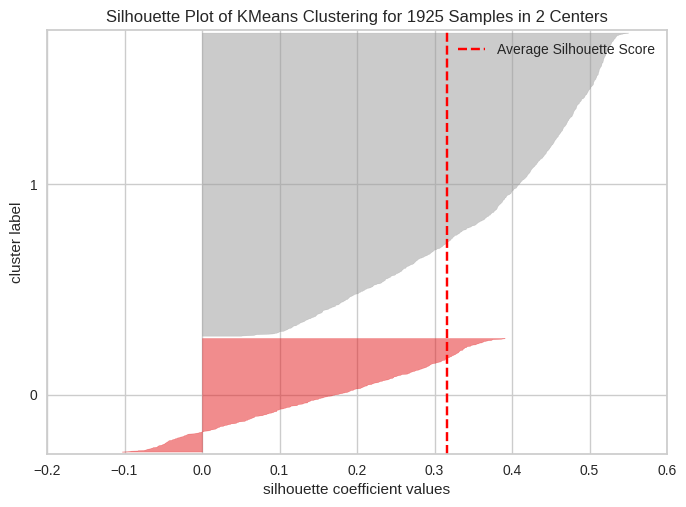

In [52]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()

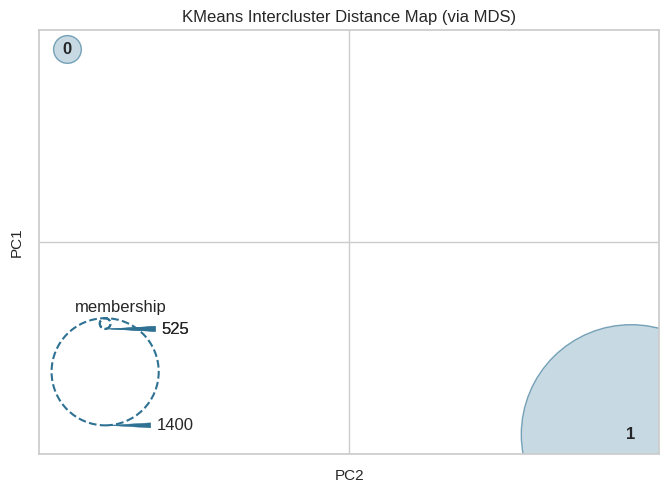

In [53]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.5 EM AIDS, PCA

In [57]:
n = 6
pca = PCA(n_components=n, random_state=100) 
X_pca=pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=100) # 80% training and 30% test

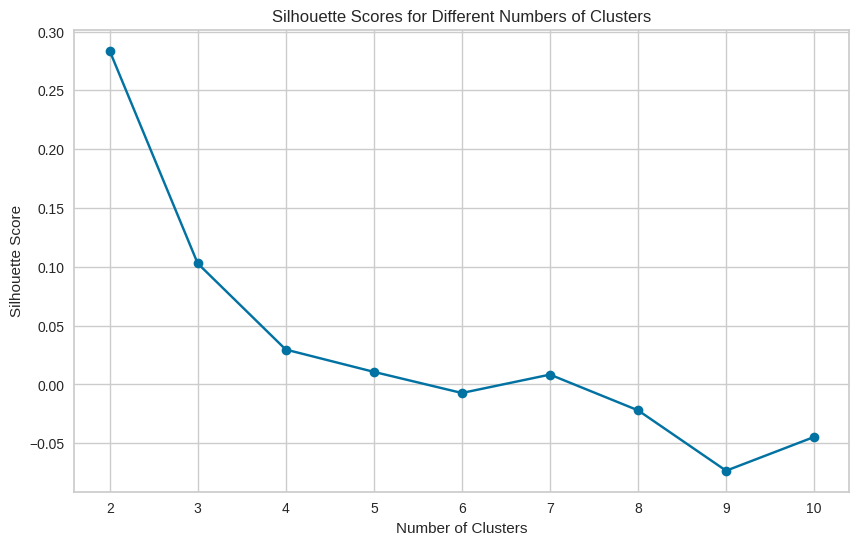

(2, 0.2836951725383738, 0.2778017992281582)

In [58]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

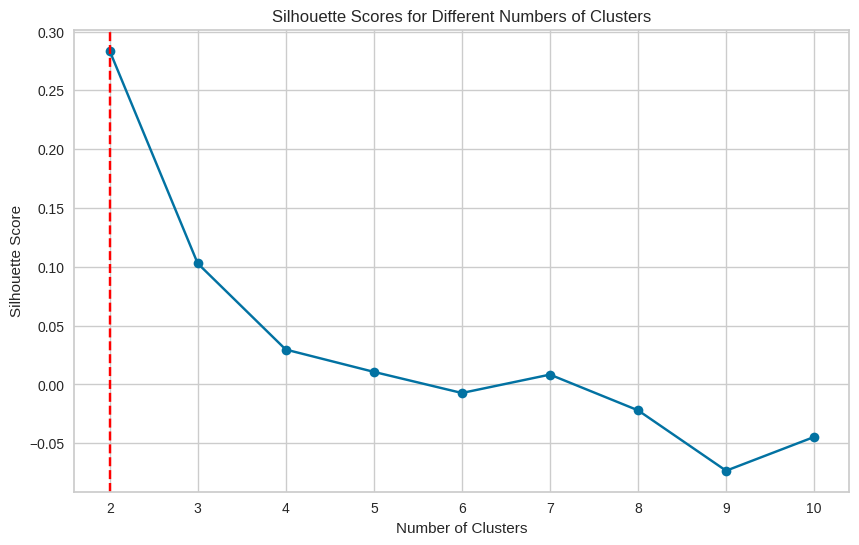

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

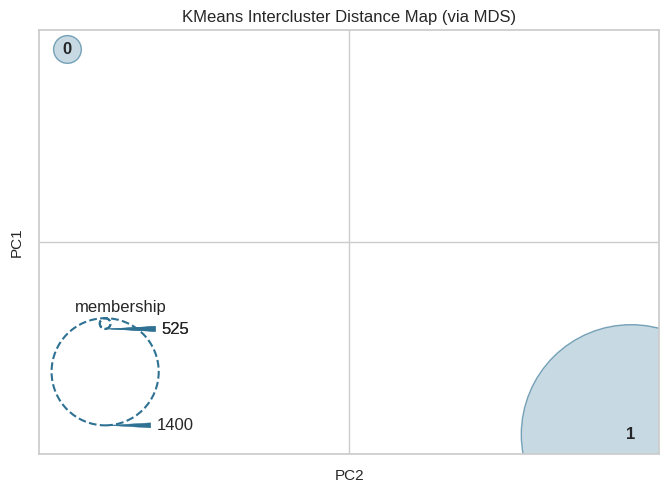

In [60]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.6 EM AIDS, ICA

In [61]:
n = 6
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=100) 
X_ica=ica.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size=0.1, random_state=100) # 80% training and 30% test

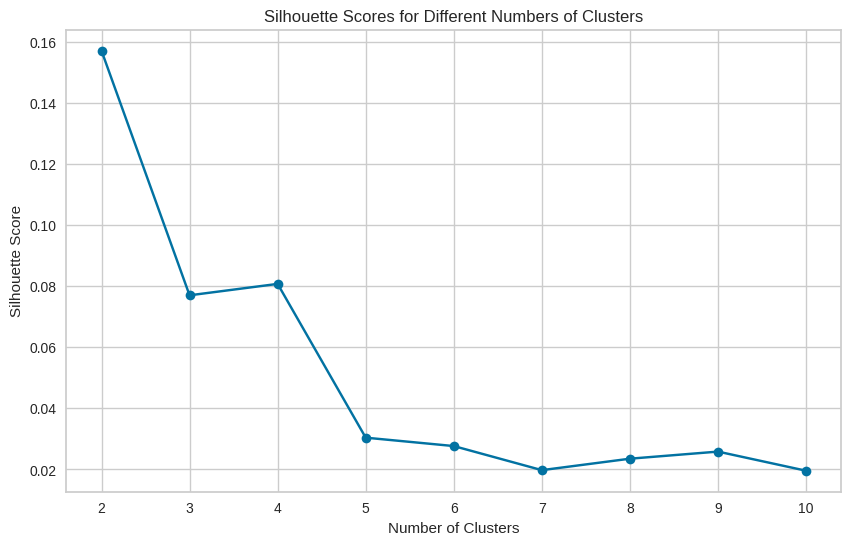

(2, 0.15705726276504028, 0.1984535658504132)

In [62]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

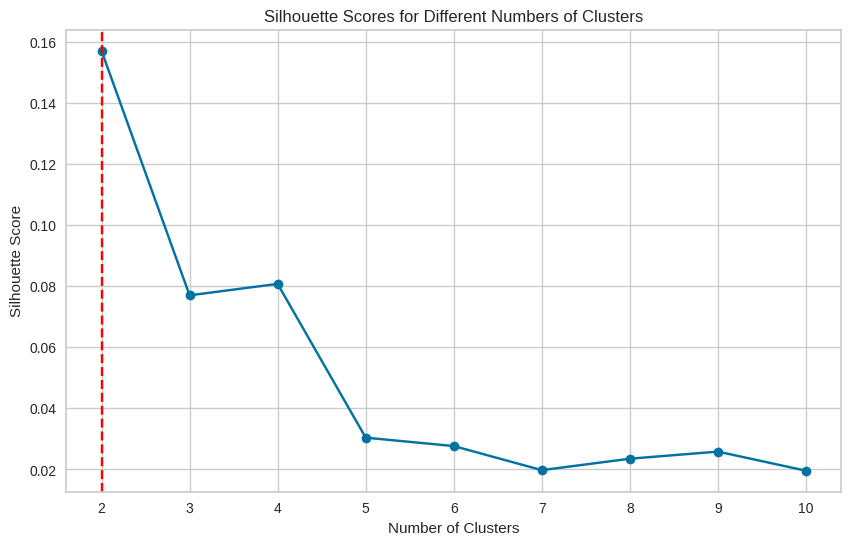

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

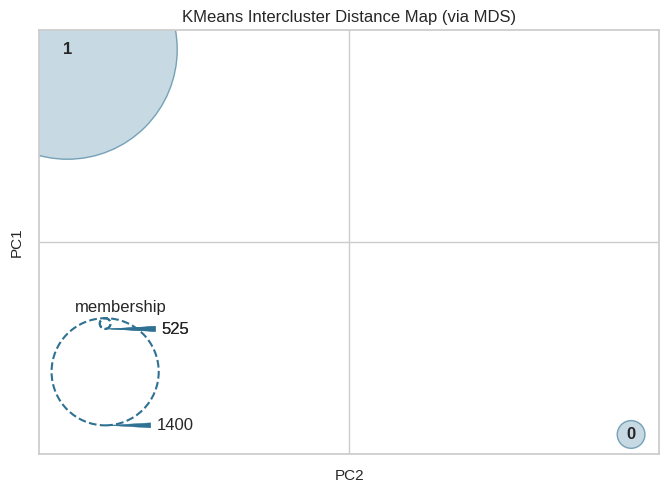

In [64]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.7 EM AIDS, RP

In [65]:
n = 2
rp = random_projection.SparseRandomProjection(n_components=n, random_state=100)
X_rp=rp.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.1, random_state=100) # 80% training and 30% test

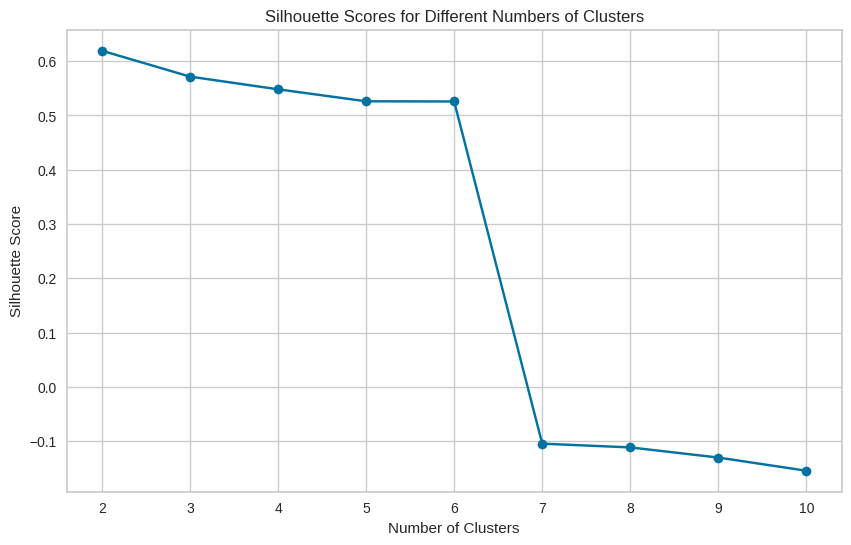

(2, 0.6192845799702862, 0.5604692417582645)

In [66]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

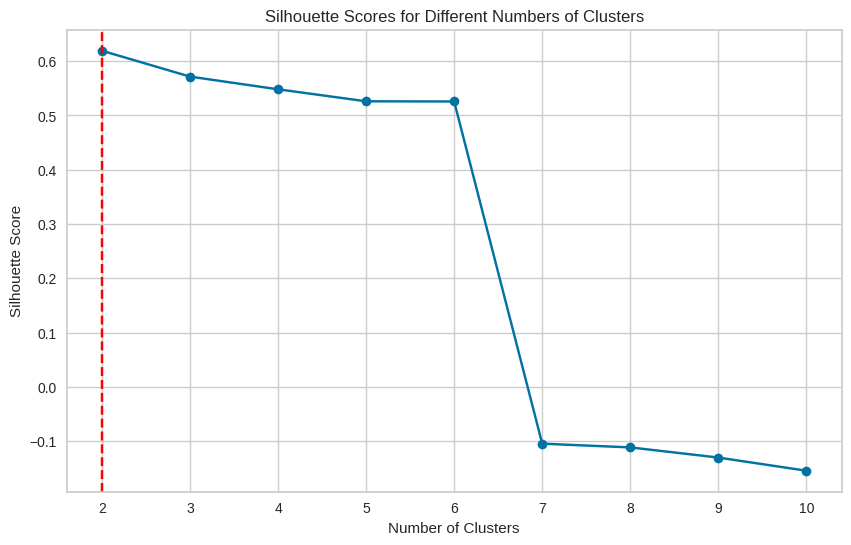

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

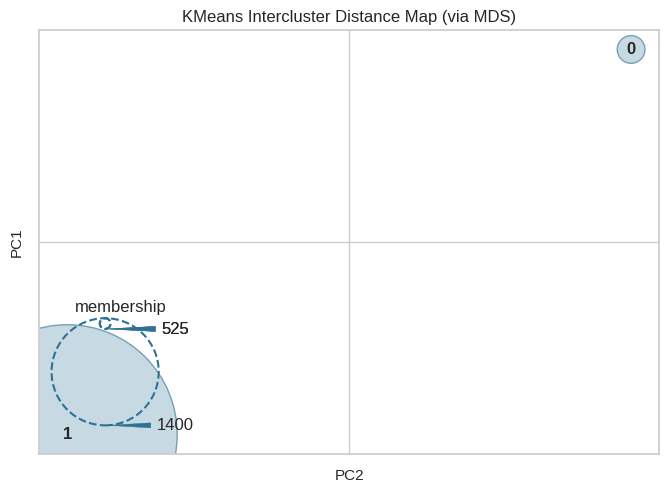

In [68]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

### 3.8 EM AIDS, SVD

In [70]:
n = 6
svd = TruncatedSVD(n_components=n, random_state=100)
X_svd=svd.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_svd, y, test_size=0.1, random_state=100) # 80% training and 30% test

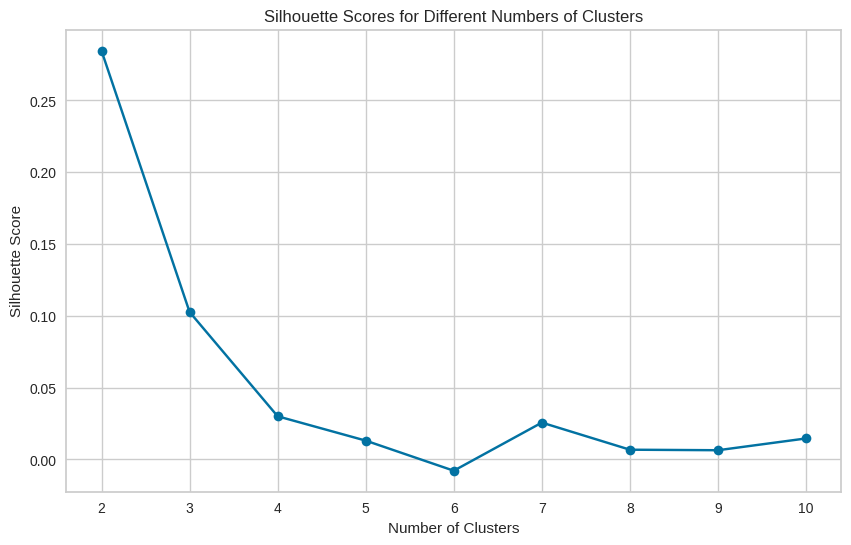

(2, 0.2846145611072277, 0.27793688300440905)

In [71]:
# Calculate silhouette score
silhouette_scores = []
cluster_range = range(2, 11)
for n_clusters in cluster_range:
    gmm = GaussianMixture(n_components=n_clusters, random_state=100)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)
    score = silhouette_score(X_train, labels)
    silhouette_scores.append(score)

# Draw silhouette score
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

# Find the best silhouette score
optimal_clusters = np.argmax(silhouette_scores) + 2  

gmm_optimal = GaussianMixture(n_components=optimal_clusters, random_state=100)
gmm_optimal.fit(X_train)
train_labels_optimal = gmm_optimal.predict(X_train)
test_labels_optimal = gmm_optimal.predict(X_test)

# Evaluate
optimal_train_silhouette = silhouette_score(X_train, train_labels_optimal)
optimal_test_silhouette = silhouette_score(X_test, test_labels_optimal)

optimal_clusters, optimal_train_silhouette, optimal_test_silhouette

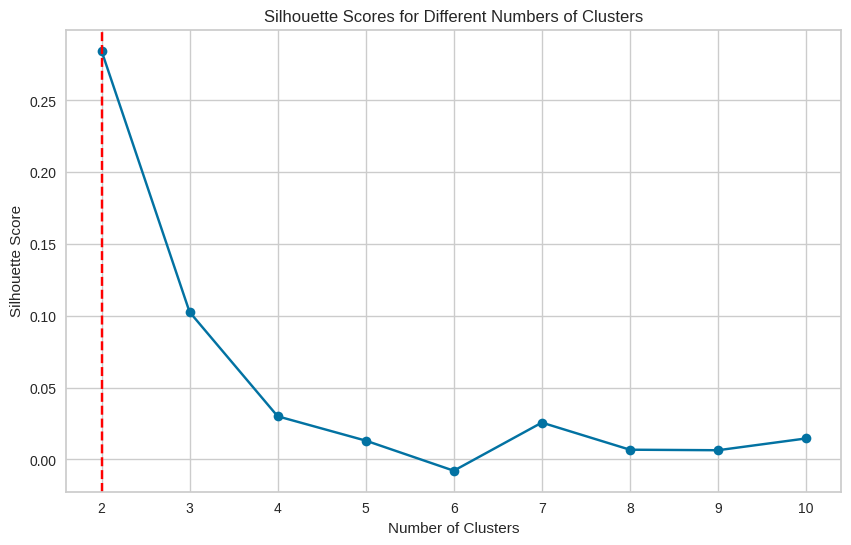

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different Numbers of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=optimal_clusters, linestyle='--', color='red')  # 최적 클러스터를 붉은색 선으로 표시
plt.show()

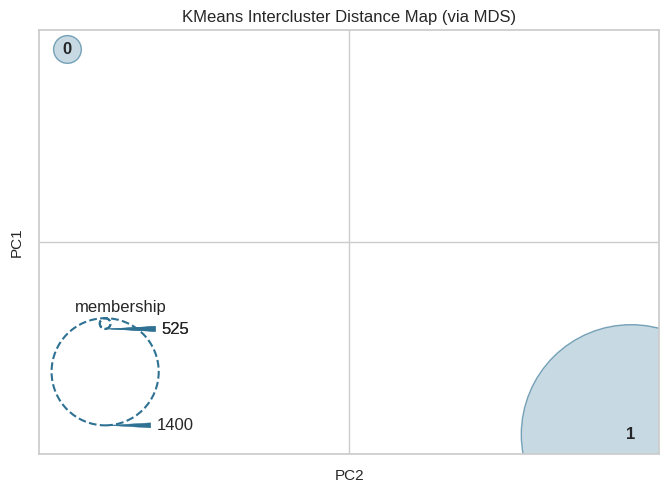

In [73]:
# InterclusterDistance
distance_visualizer = InterclusterDistance(kmeans_optimal)
distance_visualizer.fit(X_train)
distance_visualizer.finalize()

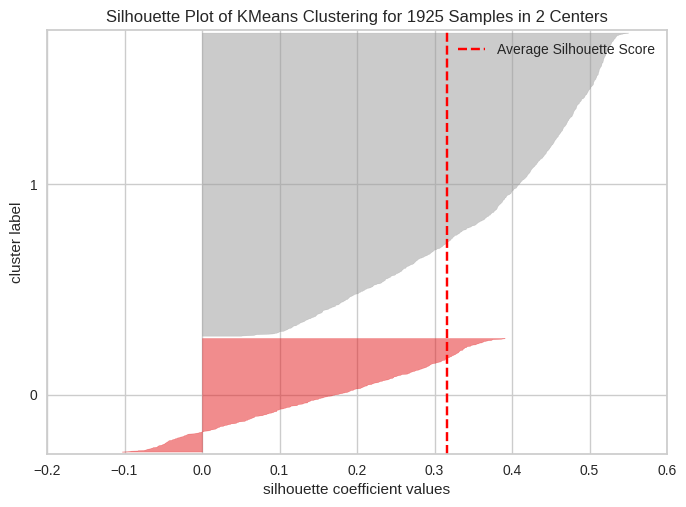

In [74]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=100)
kmeans_optimal.fit(X_train)

# Use SilhouetteVisualizer and InterclusterDistance
visualizer = SilhouetteVisualizer(kmeans_optimal)
visualizer.fit(X_train)
visualizer.finalize()